<a href="https://colab.research.google.com/github/AshrithSagar/CP220-M4RAS-2024/blob/main/13_hw_cp220_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**HW13**

Chapter 5: Bertsekas <br>
Chapter 3,4: Probabilistic Machine Learning, Kevin Murpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(100)

**Concentration Inequalities**

These essentially allow one to obtain bounds on tail probabilities

---
*$\underline{Markov\ Inequality}$*

If $X$ is a non-negative r.v., then

$P(X \geq a) \leq \frac{EX}{a}$ for $a > 0$

We can see this by:

$aP(X \geq a) = \int_a^∞ af_x(x)dx$

$EX = \int_0^∞ xf_X(x)dx = \int_0^a xf_X(x)dx + \int_a^∞ xf_X(x)dx$

Hence $EX - aP(X\geq a) = \int_0^a xf_X(x)dx + \int_a^∞ (x-a)f_X(x)dx \geq 0$

---
Example:

Let $X_i$ be 1 if the $i^{th}$ person says they will vote for BJP in the national elections 2024 and 0 otherwise. Let the sequence { $X_i$} be independent and identical bernoulli rvs $\ \sim Ber(p)$

Let $B_n = \frac{\sum_{i=1}^n X_i}{n}$ estimates the chance of BJP winning based on a sampling of $n$ people.

We would like to know how many people to ask for their opinion inorder to get some estimate with some accuracy and confidence.


$EB_n = EX_i = p$


$P(B_n  \geq p+ϵ) \leq \frac{p}{p+ϵ}$

Unfortunately - we dont get any insight as to the number of samples needed from this.

---
*$\underline{Chebychev\ Inequality}$*

Let $X$ be r.v. with mean $\mu$ and variance $\sigma^2$.

Then, the chance that it is more than $k$ std. deviations from the mean is upper bounded as:


$P(|X-\mu| \geq k\sigma) \leq \frac{1}{k^2}$

This can be seen by considering $Z = (X-\mu)^2$ and by Markov inequality:

$P(Z \geq (k\sigma)^2) \leq \frac{EZ}{(k\sigma)^2} = \frac{E(X-\mu)^2}{(k\sigma)^2} = \frac{1}{k^2}$

and $P(Z \geq (k\sigma)^2) = P((X-\mu)^2 \geq (k\sigma)^2) = P(|X-\mu| \geq k\sigma)$

We can also write this (equivalently) as:

$P(|X-\mu| \geq c) \leq \frac{\sigma^2}{c^2}$

---
Example continued:

We know that $\sigma_{X_i}^2 = p(1-p)$

and

$\sigma_{B_n}^2 = \frac{p(1-p)}{n}$


From Chebychev's inequality

$P(|B_n - p| \geq ϵ) \leq \frac{\sigma_{B_n}^2}{ϵ^2} = \frac{p(1-p)}{nϵ^2} \leq \frac{1}{4n\epsilon^2}$

Since $p(1-p)$ achieves peak value of $1/4$ for $p=1/2$

So if we want to be within $0.01$ of $p$, with $95\%$ confidence, then

$\epsilon = 0.01$ and $\frac{1}{4n\epsilon^2} < 0.05$ which means:

 $n > 500$

 In other words, if you ask 500 independent people for their opinion of if they will vote for BJP, then you can say that

 $B_{500}-0.01 < p < B_{500}+0.01$ with 95% confidence.

*$\underline{Chernoff\ Bound}$*

Let X be a rv and

$M_X(s) = Ee^{sX}$ and let it be finite at $s=0$,


For $s \geq 0$

$ X \geq a ⇔ sX \geq sa ⇔ e^{sX} \geq e^{sa}$

Hence

$P(X \geq a) = P(e^{sX} \geq e^{sa}) \leq e^{-sa}Ee^{sX}$

Similarly for $s < 0 $

$P(X \leq a ) \leq e^{-sa}Ee^{sX}$

---
Example contd. (some parts from

https://sachdevasushant.github.io/courses/15s-cpsc665/notes/concentration.pdf
)

for all $s \geq 0$ by the Chernoff bound

$P(B_n - p \leq ((1+\delta) p)) \leq e^{-s(1+\delta) p)}Ee^{sB_n}$

$Ee^{sB_n} = Ee^{\frac{s}{n}\sum_1^n X_i} = (Ee^{\frac{s}{n}X})^n$ where $X\ \ \tilde\ \ Ber(p)$

$Ee^{sX/n} = pe^{s/n} + 1-p \leq p(e^{s/n}-1) \leq e^{p(e^{s/n}-1)}$

Therefore. $Ee^{sB_n} \leq e^{np(e^{s/n}-1)}$

and

$P(B_n - p \leq ((1+\delta) p)) \leq e^{-s(1+\delta) p)}e^{np(e^{s/n}-1)}$

Above is true for all $s \geq 0$

In particular for $s/n = ln(1+\delta)$

$P((B_n - p) \leq ((1+\delta) p)) \leq (\frac{e^\delta}{(1+\delta)^{(1+\delta)}})^{np}$

We can show that $(1+\delta)^{1+\delta)} \geq e^{\delta + \delta^2/3}$

Hence

$P((B_n - p) \leq ((1+\delta) p)) \leq e^{-\frac{\delta^2np}{3}}$

Similarly

$P((B_n - p) \geq ((1-\delta) p)) \leq e^{-\frac{\delta^2np}{2}}$

Hence $P(|B_n-p| \geq \delta p) \leq  e^{-\frac{\delta^2np}{3}} + e^{-\frac{\delta^2np}{2}} < 2e^{-\frac{\delta^2np}{3}}$ from Chernoff bound.

Recall from Chebychev bound:

$P(|B_n-p| \geq \delta p) \leq \frac{Var(B_n)}{(\delta p)^2} = \frac{1-p}{np\delta^2 }$

For example, if we know that $p$ is about 0.5 and we want to estimate it within 1% (i.e. $\delta = 0.01) and with a confidence exceeding 99.9%, then Chebychev bound says we need at least 10million samples, while Chernoff bounds tells that about 13.6Lakh samples is enough
(see calculation below).

In [ ]:
q = 0.001 #(1-confidence)
p = 0.5
d = 0.01 #delta (accuracy)

print(f"From Chebychev's ineuality, n should be atleast {(1-p)/q/d**2/p}")

print(f"From Chernoff bound, n should be at least {3*np.log(2/q)*3/p/d**2}")

From Chebychev's ineuality, n should be atleast 10000000.0
From Chernoff bound, n should be at least 1368162.4427175745


EX = 10.080579401528137, Var(X)=20.23578067643614


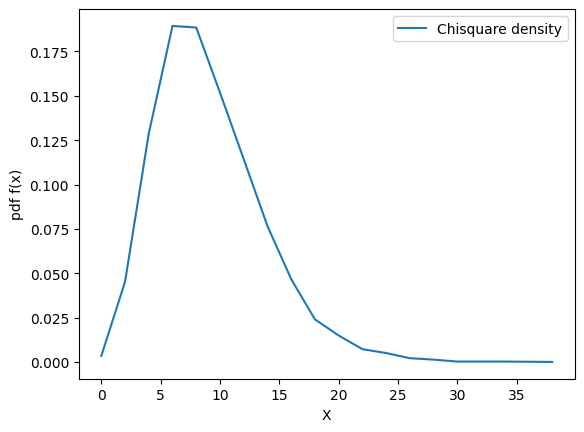

In [ ]:
# testing the bounds
nSamples = 10000
#draw samples from chisquare distribution
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.chisquare.html
df = 10 #Number of degrees of freedom, obtained by adding squares of 'df' std normal variables
X_D = rng.chisquare(df,nSamples)

nbins = 20
amin=0
amax=40
x_axis = np.arange(amin, amax, (amax-amin)/nbins)
#print(x_axis)

X_D_Hist,_ = np.histogram(X_D,nbins,(amin,amax))

#convert to pdf
X_pdf = X_D_Hist/nSamples

print(f"EX = {np.mean(X_D)}, Var(X)={np.var(X_D)}")

plt.plot(x_axis,X_pdf)
plt.legend(['Chisquare density'])
plt.ylabel("pdf f(x)")
plt.xlabel("X")
plt.show()

---
*$\underline{Weak\ Law\ of\ Large\ Numbers}$*

Let $X_1, X_2, ..., X_n$ be i.i.d with mean $\mu$ and variance $\sigma^2$

Let $M_n=\frac{\sum_{i=1}^n X_i}{n}$

Then we know that the average of $M_n$ =  $EM_n = \mu$ and $Var(M) = \frac{\sigma^2}{n}$

The weak law states that even the sample mean ($M_n$) also converges to the mean $EX_i$ in probability.

i.e.

$lim_{n→∞} P(|M_n - \mu| \geq \epsilon) = 0$

Since from Chebuchev's inequality:

$P(|M_n - \mu| \leq \epsilon ) \leq \frac{\sigma^2}{n\epsilon^2}$


This is also stated $M_n$ converges to $\mu$ in probability.

*$\underline{Convergence\ in\ Probability}$*

Let $Y_1, Y_2, ..... Y_n$ be a sequence of r.v. and let $a$ be a real number. Then

$Y_n$ converges to $a$ in probability if:

$lim_{n→∞} P(|Y_n-a| \geq \epsilon) =0$ for all $\epsilon > 0 $

What this means is that the pdf of $Y_n$ gets increasingly concentrated around $a$ with increasing $n$.


*$\underline{Central\ Limit\ Theorem}$*

Let $X_1, X_2, .., X_n$ be i.i.d with mean $\mu$ and variance $\sigma^2$

$Z_n = \frac{\sum_{i=1}^n X_i - n\mu}{\sqrt{n}\sigma}$.

We know that $EZ_n=0$ and $Var(Z_n)=1$

Then the CDF $F_{Z_n}(z)$ converges to CDF of standard normal. This is more precisely expressed as:

$lim_{n\rightarrow ∞} P(Z_n \leq z) = \Phi(z)$ for all $z$, where $\Phi(z)$ is CDF of standard normal.

Note that this holds regardless of pdf of $X_i$


*$\underline{Almost\ Sure\ Convergence}$*

If $P(lim_{n→∞} Y_n = a) =1$, it is called a.s. convergence.

The way to interpret this is at in the sample space of infinitely long sequences drawn from $Y_i$, all the outcomes are sequences with all $a$ except for a finite sub-sequence in the beginnnig.


*Example*

As an example of a sequence which converges in probability but not almost surely,

Let $Y_i = 0$ with probability $\frac{n-1}{n}$

$\ \ = 1$ with probability $\frac{1}{n}$

Then $\lim_{n→∞} P(Y_n=0)=1$ and converges in probability to the 0.

However, it doesnt almost surely converge to 0, i.e. $P(lim_{n→∞} Y_n =0) \neq 1$. To see this, assume that $lim{n→∞} Y_n =0$.

Then for every $\delta$, there exists $N(\delta)$ such that

$Y_i = 0$ for all $n > N(\delta)$.

However the probability of this happening is $lim_{n→∞}(\frac{n-1}{n})^{n-N(\delta)} = e^{-1} < 1$

*$\underline{Strong\ Law\ of\ Large\ Numbers}$*

Let $X_1, X_2, ..., X_n$ be i.i.d with mean $\mu$ and variance $\sigma^2$

Let $M_n=\frac{\sum_{i=1}^n X_i}{n}$

$P(lim_{n→∞} M_n = \mu)= 1$

i.e. $M_n$ almost surely converges to $\mu$

---
**Chapters 3 & 4 for Probabilistic Machine Learning by Kevin Murphy**

---
*$\underline{Multivariate\ Models}$*

Let $X$ be a $n$ dimensional random vector: $X = \begin{bmatrix} X_1 \\ X_2 \\ ... \\ X_n \end{bmatrix}$ (every component is a random variable)

Then the probability density function associated with this vector is given by the join density function:

$f_X(x_1,x_2, ..., x_n)$

And the mean of the component 1 is : $\mu_1 = EX_1 = \int_{x_1}\int_{x_2}...\int_{x_n} x_1 f_X(x_1, ..., x_n)dx_1dx_2...dx_n = \int_{x_1}x_1(\int_{x_2}...\int_{x_n} f_X(x_1, ..., x_n)dx_2...dx_n)dx_1 = \int_{x_1}x_1f_{X_1}(x_1)dx_1$

Here $f_{X_1}(x_1)$ is the marginal distribution of $X_1$

Similarly the expections of other components and covariances, higher moments etc can be obtained.


Then the covariance matrix is

$\Sigma = Cov(X) = E(X-EX)(X-EX)^T  = \begin{bmatrix} Var(X_1) & Cov(X_1,X_2) & ... & Cov(X_1,X_n) \\ Cov(X_2,X_1) & Var(X_2) & ...& Cov(X_2,X_n) \\ ... \\ Cov(X_1,X_n) & Cov(X_2,X_n) & ... & Var(X_n)\end{bmatrix} = \begin{bmatrix} EX_1^2 - (EX_1)^2 & EX_1X_2 - EX_1EX_2 & ... & EX_1X_n - EX_1EX_n \\ EX_2X_1-EX_2EX_1 & EX_2^2-(EX_2)^2 & ... & EX_2X_n - EX_2EX_n \\ ... \\ EX_nEX_1 - EX_nEX_1 & EX_nX_2 - EX_nEX_2 & ... & EX_n^2-(EX_n)^2 \end{bmatrix}= EXX^T - \mu\mu^T$


Where $\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \\ ... \\ \mu_n \end{bmatrix} = EX $ a $D$ dimensional column vector.

That is:

$EXX^T = \Sigma + \mu\mu^T$




---
**Q1**

Show that the covariance of an affine map $Y = AX+b$ is given as:

$\Sigma_Y = A\Sigma_XA^T$


Ans:

Let $X$ be a random vector with mean $\mu_X$ and covariance matrix $\Sigma_X$.

For the affine map $Y = AX+b$, the mean of $Y$ is given by

$
\displaystyle
\mu_Y
= \operatorname{E}[Y]
= \operatorname{E}[AX+b]
= A\operatorname{E}[X]+b
= A\mu_X+b
$

and the covariance matrix of $Y$ is given by

$
\begin{aligned}
\Sigma_Y
&
= \operatorname{E}[(Y-\mu_Y)(Y-\mu_Y)^T]
= \operatorname{E}[(AX+b-A\mu_X-b)(AX+b-A\mu_X-b)^T]
\\ &
= \operatorname{E}[(AX-A\mu_X)(AX-A\mu_X)^T]
= \operatorname{E}[A(X-\mu_X)(X-\mu_X)^TA^T]
\\ &
= A \operatorname{E}[(X-\mu_X)(X-\mu_X)^T] A^T
= A \Sigma_X A^T
\end{aligned}
$


---
**Q2**

Show that the covariance matrix is positive semi-definite

Ans:

A square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ is positive semi-definite if $\mathbf{v}^T\mathbf{A}\mathbf{v} \geq 0 \quad \forall \ \mathbf{v} \in \mathbb{R}^n \setminus \{ \mathbf{0} \}$.

Let $\mathbf{X}$ be a random vector with mean $\mu_X$ and covariance matrix $\Sigma_X$, and let $\mathbf{Y} = \mathbf{X} - \mu_X$.
Then, we have

$
\begin{aligned}
\mathbf{v}^T\Sigma_X\mathbf{v}
&
= \mathbf{v}^T\operatorname{E}[(\mathbf{X}-\mu_X)(\mathbf{X}-\mu_X)^T]\mathbf{v}
= \mathbf{v}^T\operatorname{E}[\mathbf{Y}\mathbf{Y}^T]\mathbf{v}
\\ &
= \operatorname{E}[\mathbf{v}^T\mathbf{Y}\mathbf{Y}^T\mathbf{v}]
= \operatorname{E}[(\mathbf{Y}^T\mathbf{v})^T(\mathbf{Y}^T\mathbf{v})]
= \operatorname{E}[\|\mathbf{Y}^T\mathbf{v}\|^2]
\geq 0
\end{aligned}
$

Thus, the covariance matrix is positive semi-definite.



*$\underline{Positive\ definiteness\ of\ Covariance matrix}$*

From above $\Sigma ≽ 0 $ (positive semi-definite).

Also it can be diagonalized by an orthogonal matrix S such that

$\Sigma = SDS^T$ and $SS^T=S^TS=I$

Therefore:

$EXX^T = \Sigma + \mu\mu^T = E(S^TX)(S^TX)^T = S^T\Sigma S + (S^T\mu)(S^T\mu)^T = EYY^T = D + \mu_Y\mu_Y^T$

Here $Y = S^TX$

Note that the components of $Y$ are uncorrelated as $\Sigma_Y = D$ a diagonal matrix.

Hence we can go from a correlated set of rv to uncorrelated by a suitable linear transform of the random vector.

If the random vector is Gaussian, then the uncorrelated vector's component sare also independent.

For eigen values of 0, the corresponding components of $Y$ are also 0 and we can drop them and work in a lower dimensional space where the reduced covariance matrix has only non-zero eigenvalues and hence invertible.



*$\underline{Multivariate\ Gaussian}$*

$X$ is a $n$ dimensional random vector $X\ \ \tilde\ \ N(x|\mu,\Sigma)$, with $x^T=[x_1\ x_2\ ...\ x_n]\in ℝ^n$

then

$f_X(x) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|)}}e^{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)}$

is the pdf of $X$

$\Lambda = \Sigma^{-1}$ is also called the "precision" matrix (we are assuming that $\Sigma$ is invertible (as discussed in above cell).

*$\underline{Mahalanobis\ distance}$*

Consider the level sets of (log) of constant probability of multivariate gaussian

$-log(f_X(x)) = \frac{1}{2}(x-u)^T\Lambda(x-u) = C$ a constant.

Geometrically it looks like an ellipse.

If eigenvalues of $\Sigma$ are:

$\lambda(\Sigma) = \{\lambda_1, \lambda_2, ..., \lambda_n\}$, with $\lambda_i > 0$,

then the eigen values of the precision matrix are

$\lambda(\Lambda)=\{1/\lambda_i:i = 1..n\}$

The precision matrix is also positive definite.

Let $\Lambda = S^TDS$ for orthogonal $S$ and Diagonal $D$

then

$\Lambda = \sum_{i=1}^n \frac{s_is_i^T}{\lambda_i}$

$(x-u)^T\Lambda(x-u) = y^TDy = \sum_{i=1}^n \frac{y_iy_i^T}{\lambda_d} > 0 $ with $y_i=(x-\mu)^Ts_i$. the locus for all $x$ is the probability level set and  forms an ellipsoids in n-dimensional space.

Note that $\lambda_i$ corresponds to eigen value of covariance matrix. If it is high - it means the uncertainty in that direction (eigen vector) is high and hence is given a lower weight in the distance computation. The standard deviation along that direction is: $\sqrt{\lambda_i}$


Also $D_\Sigma(x,\mu)=(x-u)^T\Sigma^{-1}(x-u)$ is called the Mahalanobis distance - analogous to the Euclidean distance - but scaled by the covariance matrix.


P C Mahalanobis: https://en.wikipedia.org/wiki/Prasanta_Chandra_Mahalanobis


*$\underline{Linear\ transform\ of\ Multivariate\ Normal}$*

Let $X$ be $n\times 1$ random vector and
$X\ \sim N(x|\mu,\Sigma)$

Let $Y=AX+b$ with $A$ an $n\times n$ invertible matrix and $b$ an $n\times 1$ vector.

Consider a volume element $dV_Y = dy_1dy_2..dy_n$. It is related to the volume element $dV_X=dx_1dx_2..dx_n$ as

$dV_Y = det(A)dV_X$

(you can recall that det(A) is the determinant and represents the volume of the tranform of a unit hypercube)

We will also write $|A|$ to represent $det(A)$

We also know that:

$\mu_Y = A\mu_X + b$

$\Sigma_Y = A\Sigma_X A^T$

Then $P(Y=y\in dV_Y) \approx f_Y(y)dV_Y = P(X=A^{-1}(y-b) \in dV_Y/det(A))=\frac{1}{\sqrt{(2\pi)^\frac{n}{2}|\Sigma_X|}}\frac{dV_Y}{|A|}e^{-\frac{1}{2}(A^{-1}(y-b)-\mu_X)^T\Sigma_X^{-1}(A^{-1}(y-b)-\mu_X)}= \frac{1}{\sqrt{(2\pi)^\frac{n}{2}|\Sigma_X|}}e^{-\frac{1}{2}((y-\mu_Y)^TA^{-T}\Sigma_X^{-1}A^{-1}(y-\mu_Y)}\frac{dV_Y}{\sqrt{|A||A^T|}}= N(y|\mu_Y, \Sigma_Y)dV_Y$

Hence $Y$ is also a MVN

*$\underline{Inverse\ of\ Block\ Matrices}$*

Let $\Sigma = \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}$

Applying Gaussian elimination at block level, we can determine,

$L = \begin{bmatrix} I & 0 \\ -\Sigma_{21}\Sigma_{11}^{-1} & I \end{bmatrix}$

$U = \begin{bmatrix} I & -\Sigma_{11}^{-1}\Sigma_{12} \\ 0 & I \end{bmatrix}$

and
$L\Sigma U = \begin{bmatrix} \Sigma_{11} & 0 \\ 0 & \Sigma/\Sigma_{11} \end{bmatrix}$

where $\Sigma/\Sigma_{11} = \Sigma_{22} - \Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12}$ is the Schur complement

Therefore $\Sigma^{-1} = \begin{bmatrix} I & -\Sigma_{11}^{-1}\Sigma_{12} \\ 0 & I \end{bmatrix}\begin{bmatrix} \Sigma_{11}^{-1} & 0 \\ 0 & (\Sigma/\Sigma_{11})^{-1} \end{bmatrix}\begin{bmatrix} I & 0 \\ -\Sigma_{21}\Sigma_{11}^{-1} & I \end{bmatrix}$


Note also that $|L\Sigma U| = |\Sigma| = |\Sigma_{11}||\Sigma/\Sigma_{11}|$ as $|L|=|U|=1$

*$\underline{Marginals\ and\ Conditionals\ of\ Multivariate Normal (MVN)}$*


Let an  n-dimensional random vector, $X^T = [X_1^T\ X_2^T]$ with $X_1$ and $X_2$ having dimensions $n_1$ and $n_2$ ($n_1+n_2=n$)

Let $EX_1 = \mu_1$, $EX_2=\mu_2$

and

$\Sigma = \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}$

with $\Sigma_{ij} = Cov(X_i,X_j)$,

(Note cross covariance $\Sigma_{ij} = E(X_i-EX_i)(Y_j-EY_j)^T$


We can reorganize the exponent of the gaussian using the schur complement decomposition from previous cell as:

$[(X_1-\mu_1)^T\ (X_2-\mu_2)^T]\ \Sigma^{-1}\begin{bmatrix} X_1 - \mu_1 \\ X_2 - \mu_2\end{bmatrix}= [(X_1-\mu_1)^T (X_2-\mu_2)^T ]\begin{bmatrix} I & -\Sigma_{11}^{-1}\Sigma_{12} \\ 0 & I \end{bmatrix}\begin{bmatrix} \Sigma_{11}^{-1} & 0 \\ 0 & (\Sigma/\Sigma_{11})^{-1} \end{bmatrix}\begin{bmatrix} I & 0 \\ -\Sigma_{21}\Sigma_{11}^{-1} & I \end{bmatrix} \begin{bmatrix} X_1 - \mu_1 \\ X_2 - \mu_2\end{bmatrix} = (X_1-\mu_1)^T\Sigma_{11}^{-1}(X_1-\mu_1) + (X_2-\mu_2 - \Sigma_{21}\Sigma_{11}^{-1}(X_1-\mu_1))^T(\Sigma/\Sigma_{11})^{-1}(X_2-\mu_2 - \Sigma_{21}\Sigma_{11}^{-1}(X_1-\mu_1))$

Hence we can factor $N(x|\mu,\Sigma) = N(x_1|\mu_1,\Sigma_{11})N(x_2|\mu_2+\Sigma_{21}\Sigma_{11}^{-1}(x_1-\mu_1),\Sigma/\Sigma_{11})$


Marginal of $X_1$:

$f_{X_1}(x_1) = \int_{X_2} f_X(x_1,x_2)dx_2 = \int_{X_2}N(x_1|\mu_1,\Sigma_{11})N(x_2|\mu_2
+\Sigma_{21}\Sigma_{11}^{-1}(x_1-\mu_1),\Sigma/\Sigma_{11}) = N(x_1|\mu_1, \Sigma_{11}) $


is also a multi-variate normal

and from the above the conditional $X_2|X_1$ is ,

$f_{X_2|X_1} = N(x_2|\mu_2+\Sigma_{21}\Sigma_{11}^{-1}(x_1-\mu_1),\Sigma/\Sigma_{11})$ is also a MVN.

Similarly the marginal $f_{X_2}(x_2) = N(x_2|\mu_2,\Sigma_{22})$

*$\underline{Example}$*

Let $X,Y$ be two univariate gaussian rv, which are jointly Gaussian and with correlation $\rho$,  mean, $\mu_x, \mu_y$ and variance $\sigma_x, \sigma_y$ respectively.

Then $\Sigma = \begin{bmatrix} \sigma_x^2 & \rho \sigma_x\sigma_y \\ \rho\sigma_x\sigma_y & \sigma_y^2\end{bmatrix}$

$f_{Y|X}(y) = N(y|\mu_y-\frac{\rho\sigma_y}{\sigma_x}(x-\mu_x),\sigma_y^2(1-\rho^2))$

We can interpret it by looking at the level set for 2D correlated Gaussian and seeing that if $X=x$, then we are taking a slice of the ellipses at $X=x$ and hence get a modified gaussian for the $Y|X=x$


*$\underline{Uncorrelated\ implies\ Independence\ for\ Gaussians}$*

Let $X_1, X_2$ be jointly Gaussian and uncorrelated. This means $\Sigma_{12}=0$ and $\Sigma_{21}=\Sigma_{12}^T = 0$.

Hence $\Sigma/\Sigma_{11} = \Sigma_{22}$

and $f_{X_2|X_1}(x_2) = f_{X_2}(x_2)$

therefore $f_X(x_1, x_2) = f_{X_1}(x_1)f_{X_2}(x_2)$ and they are independent.

---
**Q3**

Let $X\ \sim \ N(x|0,1)$ and $Y=WX$ where $P(W=1)=P(W=-1)=0.5$

a) Show $Y \sim N(y|0,1)$

b) Show $Cov(X,Y)=0$

Ans:

(a)
Since $X \sim \mathcal{N}(0,1)$, we have $f_X(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$.

The random variable $W$ is a discrete random variable with $P(W=1)=P(W=-1)=0.5$, thereby we have that $f_W(w) = \frac{1}{2}\mathbf{1}_{\{w=1\}} + \frac{1}{2}\mathbf{1}_{\{w=-1\}}$.

Now, we have

$
\displaystyle
f_Y(y)
= \sum_{w \in \{-1,1\}} f_{Y|W}(y|w)f_W(w)
= \frac{1}{2}f_{X}(y) + \frac{1}{2}f_{-X}(y)
= \frac{1}{2}\frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}} + \frac{1}{2}\frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}}
= \frac{1}{\sqrt{2\pi}}e^{-\frac{y^2}{2}}
\implies 
Y \sim \mathcal{N}(0,1)
$


---
**Inference and Estimation**

*$\underline{Statistics}$*

*Inference* refers to figuring out, quantitatively, aspects of the population given some samples. It involves building estimators (or statistics - which are formulae for combining data - e.g. average), for the various parameters of the population distribution and quantify their uncertainties. Here estimation is part of the inferencing process.

$\underline{Machine\ Learning}$

Usually develops a parametrized model of the phenomenon, where the model parameters are *estimated* (aka **learning**) from the data.

Inference is the process of using the model  to make predictions. It has a narrower connotation than that in Statistics.

*$\underline{Example:\ Bayesian\ Inference}$*

A patient is tested positive for a disease and the test is 99% accurate (i.e given the disease the test shows positive 99% of the time and given no disease it indicates negative 99% of the time). However the disease is prevalent in only about 1 in 10000 people. What is the chance that the patient has the disease?

Ans:

Let $D=1$ if someone has the diease and 0 otherwise.

$P(D=1)=0.0001$

Let $T=1$ if test returns positive and 0 otherwise.

Then $P(T=1|D=1) = 0.99$ (true positive) and $P(T=0|D=1)=0.01$ (false negative)

Similarly,

$P(T=0|D=0)=0.99$ (true negative), $P(T=1|D=0)=0.01$ (false positive)




We need to find $P(D=1|T=1)$

$P(D=1|T=1)=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}= \frac{P(T=1|D=1)P(D=1)}{P(T=1|D=1)P(D=1)+P(T=1|D=0)P(D=0)} = \frac{0.99*0.0001}{0.99*0.0001+0.01*0.9999} = 0.0098$

So even though test seems very accurate, since the disease is very rare, the chance of having the disease is pretty small. Hence one needs to drive down the chance of false positive even more for the test.



**Maximum Likelihood Estimation**

Given data samples $x_D=\{x_1,x_2,...\}$ and a parametrized probability model for generating the sample, $X\ \ \tilde\ \ p(x;\theta)$, then the MLE estimate of the parameter is the one that gives the maximum probability of observing that data $x_D$.

$\theta_{mle} = argmax_\theta p(x_D|\theta)$

Usually the data samples are assumed to be independently sampled hence

$p(x_D;\theta) = ∏ p(x_i;\theta)$ and is also called the likelihood $L(\theta)$.

Note that the likelihood is a function of the parameter to be estimated.

Log likelihood is:

 $LL(\theta) = log L(\theta) = \sum log(p(x_i;\theta))$

and is more convenient to work with (due to sum rather than a product).

Hence MLE estimate of the parameter $\theta$ is:

$\theta_{mle} = argmax_\theta LL(\theta) = argmin_\theta -LL(\theta)$

where $-LL(\theta)=NLL(\theta)$ is sometimes more convenient and is called negative log likelihood.

*$\underline{Example:Estimating\ probability\ of\ head}$*

Let a coin toss give heads with rv $H\ \ \tilde\ \ Ber(\theta)$

Given a sequence of $n$ tosses with observations $h_D=\{h_1, h_2, ..... h_n\}$, where $h_i$ is either 0 or 1 based on tail of head,

we need to find an estimator for the parameter $\theta$, the probability of getting a head.

$L(\theta) = p(h_D;\theta) = \prod_1^n p(h_i;\theta)= \prod_1^n\theta^{h_i}(1-\theta)^{(1-h_i)}$

Therefore

$LL(\theta) = \sum_1^n h_i log(\theta)+(1-h_i)log(1-\theta) = log(\theta)(\sum h_i) + log(1-\theta)\sum (1-h_i)$

Since $\theta_{mle} = argmax_\theta LL(\theta)$,


$\frac{dLL(\theta)}{d\theta} = \frac{\sum h_i}{\theta} - \frac{\sum 1-h_i}{1-\theta} =0 $ and we get $\theta_{mle} = \frac{\sum_1^n h_i}{n}$ which is just to sum up binary sample values!  (you can check that this is the maximum by checking the sign of second derivative).

*$\underline{Example:MLE\ for\ Univariate\ Gaussian\ Parameters}$*

Let $X\ \ \tilde\ \ N(x|\mu,\sigma^2)$

and $x_D = \{x_1, x_2, ...., x_n\}$ be the observed data samples, each being sampled independently and we would like to estimate the parameters $\mu, \sigma$.

Then the likelihood

$L(\mu,\sigma) = \prod_1^n \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$

and negative log likelihood is:

$NLL(\mu,\sigma) = \frac{1}{2}\sum_i^n \frac{(x_i-\mu)^2}{\sigma^2} + nlog\sigma + \frac{n}{2}log2\pi$

$\frac{dNLL}{d\mu}= \frac{1}{\sigma^2}\sum_1^n (x_i-\mu) = 0$ leads to $\mu_{mle} = \frac{\sum_1^nx_i}{n}$

and

$\frac{dNLL}{d\sigma} = \frac{-\sum (x_i-\mu)^2}{\sigma^3} + \frac{n}{\sigma}=0$ and leads to $\sigma_{mle}^2 = \frac{\sum_1^n (x_i-\mu_{mle})^2}{n}$

The above is a biased estimator (i.e. $E\sigma_{mle} \neq \sigma$)


*$\underline{MLE\ for\ MVN}$*

Let $X\ \ \tilde\ \ N(x|\mu,\Sigma)$ be a n-dimensional random vector which is multivariate normally distributed.

Let $x_D = \{x_1,x_2,...,x_k\}$ be $k$ observations each of dimension $n$

We will write it as a $n\times k$ data matrix: $x_D = \begin{bmatrix}x_1 & x_2 & ... & x_k\end{bmatrix}$

Then the Maximum Likelihood Estimate of $\mu, \Sigma$ are:

$\mu_{mle} = \frac{\sum_{i=1}^k x_i}{k}$

$\Sigma_{mle} = \frac{x_Dx_D^T}{D} - \mu_{mle}\mu_{mle}^T$



**Computing uncertainties in the estimates via Bayesian Inference**


Given an estimate of parameters $\hat{\theta}$ computed from data $D$, we would also like to estimate the uncertainty of the estimate.

We have seen how inequality bounds can give you one approach to get confidence intervals, i.e. bounds on $P(|\hat{\theta}-\theta_{actual}|\leq 1-\epsilon)$


Another approach is to estimate the entire posterior distribution $f_{\hat{\Theta}}(\hat{\theta})$ of the random vector $\hat{\Theta}$

In order to simplify typing, we will drop the hat notation (for the estimate).

Treating the parameters  as a random vector (note this is a modeling choice - to represent unknown but fixed parameters as a random vector with a distribution):

Let $f_\Theta(\theta)$ be the density we believe the parameter has.

Then by Bayes rule, once we get new data $D$,

we can do

$f_{\Theta|D}(\theta) = \frac{P(D|\theta)f_\Theta(\theta)}{P(D)}$

Here $P(D|\theta)$ is the likelihood of seeing the data for a particular value of the parameter.

$f_\Theta(\theta)$ is called the prior and

$f_{\Theta|D}(\theta)$ is called the posterior distribution


*$\underline{Conjugate\ Prior}$*

As a modeling choice, certain analytical forms of the prior density, combines with speicific forms of the likelihood function to results in  a posterior density which can be analytically computed.

In such cases, it is easy to do the computations and the prior is a conjugate prior to that likelihood function.


*$\underline{Example: Ber(\theta)}$

Let $D=\{x_1,x_2,...,x_N\}$ data from N independent samples of a Bernoulli random variable

As we have seen, the likelihood is:

$L(\theta;D) = \prod_{i=1}^n \theta^{x_i}(1-\theta)^{(1-x_i)} = \theta^{N_1}(1-\theta)^{N_0}$

Where $N_1$ is number of 1's and $N_0$ is number of 0s.

A conjugate prior is the Beta distribution:

$f_\Theta(\theta) = Beta(\theta|a,b) =
\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1}(1-\theta)^{b-1}$ with $0 \leq \theta \leq 1$

with $\Gamma(a) = \int_0^∞ x^{a-1}e^{-x}dx$

for integer $n$, $\Gamma(n) = n-1!$ (using integration by parts)

$\Gamma(a+1)=a\Gamma(a)$


Hence the posterior is also a Beta distribution with

$f_\Theta(\theta) = Beta(\theta|a+N_1, b+N_0)$

<img src='https://drive.google.com/uc?export=view&id=17qEUod78-VGPa4xVmxbB1clguqnhidk8' width=800px>

---
**Q4**

If $\theta\ \ \tilde\ \ Beta(\theta|a,b)$, then show that

a) $E\theta = \frac{a}{a+b}$

b) $Var(\theta) = \frac{ab}{(a+b)^2(a+b+1)}$

c) $mode(\theta) = \frac{a-1}{a+b-2}$

Ans:

With $\Theta \sim \text{Beta}(a,b)$, we have

(a)

$
\begin{aligned}
E[\Theta]
&
= \int_0^1 \theta \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1}(1-\theta)^{b-1} d\theta
= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \int_0^1 \theta^{a}(1-\theta)^{b-1} d\theta
\\ &
= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a+1)\Gamma(b)}{\Gamma(a+b+1)}
= \frac{a}{a+b}
\end{aligned}
$

(b)

$
\begin{aligned}
\text{Var}[\Theta]
&
= E[\Theta^2] - (E[\Theta])^2
= \int_0^1 \theta^2 \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \theta^{a-1}(1-\theta)^{b-1} d\theta - \left( \frac{a}{a+b} \right)^2
\\ &
= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \int_0^1 \theta^{a+1}(1-\theta)^{b-1} d\theta - \left( \frac{a}{a+b} \right)^2
\\ &
= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(a+2)\Gamma(b)}{\Gamma(a+b+2)} - \left( \frac{a}{a+b} \right)^2
\\ &
= \frac{a(a+1)}{(a+b)(a+b+1)} - \left( \frac{a}{a+b} \right)^2
= \frac{ab}{(a+b)^2(a+b+1)}
\end{aligned}
$


*$\underline{Gaussian\ Conjugate\ Prior\ and\ Kalman\ gain}$*

Let $X\ \ \tilde\ \ N(x|\mu_X,\Sigma_X)$ be a random vector which we would like to estimate (i.e. estimate its distribution or its moments).

And let $Z$ be a measurement of $X$ with an additive  Gaussian noise $Y\ \ \tilde\ \ N(y|0,\Sigma_y)$

i.e. $Z = WX + Y$ where $W is a  matrix.

Then we know that,
$\mu_Z = W\mu_X$ and

$\Sigma_Z = W\Sigma_X W^T + \Sigma_Y$ and that

$Z$ is gaussian with $Z=N(z|\mu_Z,\Sigma_Z)$


We would like to get $f_{X|Z}(x)$, i,e, the posterior after the measurement.

We will use the following to get this:

$f_{X|Z}(x)f_Z(x) =f_{XZ}(x,z)= f_{Z|X}(z)f_X(x)$

We will guess that the joint distribution $f_{XZ}(x,z)$ is also Gaussian. To determine its moments, lets find the cross co-variance $\Sigma_{XZ} = EXZ^T-(EX)(EZ)^T = XX^TW^T+XY^T - EX(EX)^T\mu^T = \Sigma_X W^T$ as $X,Y$ are independent and $EXY^T = EXEY^T = 0$


Therefore, the we can write down the joint distribution of $X,Z$ is

$f_{XZ}(x,z) = N(x,z|(\mu_X,\mu_Z),\Sigma)$

with
$\Sigma = \begin{bmatrix} \Sigma_X & \Sigma_XW^T \\ W\Sigma_X & W\Sigma_XW^T+\Sigma_Y \end{bmatrix}$

You can cross check that this gives the right marginals for $f_{Z|X}(z) = N(z|Wx,\Sigma_y)$

Now we can calculate the posterior distribution of $X$, given a measurement $Z=z$ as $\frac{f_{X,Z}(x,z)}{f_Z(z)}$, which we can write down be refactoring the joint to result in:

$f_{X|Z}(x) = N(x|\mu_{X|Z},\Sigma_{X|Z})$

with

$\mu_{X|Z} = \mu_X + \Sigma_XW^T\Sigma_Z^{-1}(z-W\mu_X)$

$\Sigma_{X|Z} = \Sigma/\Sigma_Z = \Sigma_X - \Sigma_XW^T\Sigma_Z^{-1}W\Sigma_X$

and $\Sigma_Z = W\Sigma_X W^T + \Sigma_Y$

In a more compact form, this is written as:

$K = \Sigma_XW^T\Sigma_Z^{-1}$ also called the Kalman gain

then,
$\mu_{X|Z} = \mu_X + K(z-W\mu_X) = (I-KW)\mu_X + Kz$

$\Sigma_{X|Z} = \Sigma/\Sigma_Z = (I - KW)\Sigma_X$

Note that in the formula: $f_{X|Z}(x) \propto f_{Z|X}(z)f_X(x)$, the likelihood, prior and posterior are all Gaussian. Hence Gaussian is also the conjugate prior for a Gaussian likelihood.

---
*Example*

Consider a univariate case, with $\Sigma_X = \sigma_x^2$ and $W = w$ as the measurement gain and $\Sigma_Y = \sigma_y^2$ as the measurement noise.


Then $\Sigma_Z = \sigma_z^2 = w^2\sigma_x^2 + \sigma_y^2$

and the Kalman gain is $K = \frac{w\sigma_x^2}{w^2\sigma_x^2 + \sigma_y^2}$.



Therefore $\mu_{X|Z} = \mu_X + K(z-w\mu_X) = \frac{\sigma_y^2}{w^2\sigma_x^2+\sigma_y^2}\mu_X + \frac{w^2\sigma_x^2}{w^2\sigma_x^2+\sigma_y^2}\frac{z}{w}$ and $\sigma_{X|Z}^2 = (1-Kw)\sigma_x^2 = \frac{\sigma_y^2\sigma_x^2}{w^2\sigma_x^2+\sigma_y^2}$


Note if $\sigma_y → 0$ , it means the measurements are more accurate, then $Kw → 1$ and. more weightage is given to measurements $(1-Kw)$

On the other hand, with poor measurements,  $\sigma_y^2 >> w^2\sigma_x^2$, then $Kw << 1$ and tends to 0 and less weightage is given to measurements.

Thus with good measurements $Kw→1$ and posterior is more influenced by data.

---
*$\underline{Multisensor\ Fusion}$*

Assume there are two independent sensors, giving a measurement of $X$ as:

$Z_1 = W_1 X + Y_1$ with $Y_1\ \ \tilde\ \ N(y_1|0,\Sigma_{Y_1})$

and

$Z_2 = W_2 X + Y_2$ with $Y_2\ \ \tilde\ \ N(y_2|0,\Sigma_{Y_2})$

and the conditional measurement independence is described formally as :

$f_{Z_1,Z_2|X}(z_1,z_2) = f_{Z_1|X}(z_1)f_{Z_2|X}(z_2)$


We would like to figure out how to best estimate the vector $X$ given the measurements $Z_1, Z_2$, i.e. find the posterior $f_{X|Z_1,Z_2}(x)$.

We can concatenate the measurements as:

$Z = \begin{bmatrix} Z_1 \\ Z_2 \end{bmatrix} = \begin{bmatrix} W_1 \\ W_2 \end{bmatrix} X + \begin{bmatrix}Y_1 \\ Y_2 \end{bmatrix}$


$\Sigma_Z = W\Sigma_XW^T+\begin{bmatrix}\Sigma_{Y_1} & 0 \\ 0 & \Sigma_{Y_2} \end{bmatrix}$



$K = \Sigma_X W^T \Sigma_Z^{-1}$

and apply the formulae  from above cell for deriving $\mu_{X|Z}$ and $\Sigma_{X|Z}$.

However we can get a bit more insight by looking at this as follows:


$f_{X|Z_1,Z_2}(x) = \frac{f_{Z_1,Z_2|X}(z_1, z_2)f_X(x)}{f_{Z_1,Z_2}(z_1,z_2)} = \gamma f_{Z_1,Z_2|X}(x)f_X(x)$ where $\gamma$ is independent of $x$ and is whatever needed to normalize the pdf.

Now $Z_1, Z_2$ are independent measurements given a particular value of $X$ (or conditioned on X).

Hence $f_{Z_1, Z_2|X}(z_1, z_2) = f_{Z_1|X}(z_1)f_{Z_2|X}(z_2) = N(z_1|W_1x, \Sigma_{Y_1})N(z_2|W_2x, \Sigma_{Y_2})$

Hence $f_{X|Z_1,Z_2}(x) = \gamma N(z_1|W_1x, \Sigma_{Y_1})N(z_2|W_2x, \Sigma_{Y_2}) N(x|\mu_X, \Sigma_X)$

Lets look at the argument of the exponent on both sides:

Left hand side:

$x^T\Sigma_{X|Z}^{-1}x - 2x^T\Sigma_{X|Z}^{-1}\mu_{X|Z} + \mu_{X|Z}^T\Sigma_{X|Z}^{-1}\mu_{X|Z}$

Right hand side:

$(z_1-W_1x)^T\Sigma_{Y_1}^{-1}(z_1-W_1x) + (z_2-W_2x)^T\Sigma_{Y_2}^{-1}(z_2-W_2x) + (x-\mu_X)\Sigma_X^{-1}(x-\mu_X)$

Equating the terms corresponding the $x$, we get

$\Sigma_{X|Z}^{-1} = W_1^T\Sigma_{Y_1}^{-1}W_1 + W_2^T\Sigma_{Y_2}^{-1}W_2 + \Sigma_X^{-1}$

and

$\Sigma_{X|Z}^{-1}\mu_{X|Z} = W_1^T\Sigma_{Y_1}^{-1}z_1 + W_2^T\Sigma_{Y_2}^{-1}z_2 +  \Sigma_X^{-1} \mu_X$


(note the terms not dependent on $x$ get aborbed into the normalization constant).




*Example*

Let two sensors have variances $\sigma_1^2$ and $\sigma_2^2$ respectively. Then the optimal way to combine their measurements $z_1$ and $z_2$ is:

$\sigma_{Z}^{-2} = \sigma_1^{-2}+\sigma_2^{-2}$

and $Z = \frac{\sigma_Z^2}{\sigma_1^2}z_1+\frac{\sigma_Z^2}{\sigma_2^2}z_2 = \frac{\sigma_2^2}{\sigma_1^2+\sigma_2^2}z_1  + \frac{\sigma_1^2}{\sigma_1^2+\sigma_2^2}z_2$

Thus the sensor with low variance is given high weightage and vice-versa

---
**Q5**


Consider two temperature sensors with the data on their errors during calibration as below:

error data sensor 1: [-0.11575496  0.02897558  0.07808541  0.05439736 -0.09613826  0.10710087  0.07014557  0.07049735  0.07450626  0.11043472]

error data for sensor 2:
[ 0.44859448 -0.12229862  0.00944224  0.35084694 -0.26759597  0.06511489
 -0.13782354 -0.00396436  0.09495065 -0.38622028]


Find the optimal temperature estimate if sensor 1 report 21.1 and sensor 2 reports 23.2


Ans:



In [ ]:
nSamp = 10


#sensor 1
data_1 = np.array([-0.11575496,0.02897558,0.07808541,0.05439736,-0.09613826,0.10710087,
  0.07014557,0.07049735, 0.07450626, 0.11043472])
var1=np.sum(data_1*data_1)/(nSamp-1)
#print(f"Variance of sensor 1 is {var1}")
m1 = np.sum(data_1)/nSamp
var_act1= var1-m1*m1
print(f"Sensor1 bias={m1}, variance={var_act1}")


data_2 = np.array([0.44859448,-0.12229862, 0.00944224,  0.35084694, -0.26759597,  0.06511489,
 -0.13782354, -0.00396436,  0.09495065, -0.38622028])
var2 = np.sum(data_2*data_2)/(nSamp-1)
m2 = np.sum(data_2)/nSamp
#print(f"Variance of sensor 2 is {var2}")
var_act2 = var2-m2*m2
print(f"Sensor2 bias={m2}, variance={var_act2}")

T1 = 21.1
T2 = 23.2

#print(f"The optimal temperature estimate without considering bias is = {var2*T1/(var1+var2) + var1*T2/(var1+var2)}")

print(f"The optimal temperature estimate is = {<yourcode>}")


Sensor1 bias: bias=0.03822499, variance=0.006499477687241411
Sensor2 bias=0.005104642999999992, variance=0.06579805574772601
The optimal temperature estimate is = 21.253540447087815


---
**Q6**

Exercise 3.7 from PML text:

Suppose we have two sensors with known (and different) variances $\sigma_1^2$ and $\sigma_2^2$, but unknown (and the same)
mean μ.

Suppose we observe $n_1$ observations $z_1 ∼ N(μ,\sigma_1)$ from the first sensor and $n_2$ observations
$z_2 ∼ N(μ,\sigma_2)$ from the second sensor. (For example, suppose μ is the true temperature outside, and sensor 1
is a precise (low variance) digital thermosensing device, and sensor 2 is an imprecise (high variance) mercury thermometer.)

Let $D$ represent all the data from both sensors.

What is the posterior $p(μ|D)$, assuming a non-informative prior for μ (which we can simulate using a Gaussian with a precision of 0)?

Give an explicit expression for the posterior mean and variance.

Ans:



---

**Kalman filter for a linear dynamical system**


We will now build upon the previous results to derive the optimal state estimate for a linear dynamical system, by combining state evolution based on the state transition equation, with measurements.

Let at time step $k$

$X_k$ be the state of the system. We will model this as gaussian with mean $\mu_{X_k}$ and covariance $\Sigma_{X_k}$


$u_k$ be the input to the system

$A_k$ state transition matrix

$B_k$ be the input to state matrix

$P_k$ be the process noise which we will model as 0 mean gaussian with covariance $\Sigma_{P_k}$

The dynamical evolution of the system is then given as

$X_{k+1} = A_k X_k + B_k u_k + P_k$


$W_k$ be the measurment matrix

$M_k$ be the measurement noise which is also assumed to be Gassian with zero mean and  covariance $\Sigma_{M_k}$

$Z_k$ is the measurement and is given as

$Z_k = W_k X_k + M_k$

Kalman filtering is done in two steps:

*$\underline{Predict\ step}$*

Here we use the state value at time k to predict its value at k+1 using the dynamical equation.

Let $X_{k+1}^p$ be the predicted state at $k+1$

Note since all input variables are assumed to be distributed as gaussian, the outputs will also be gaussian. Hence we only need to keep track of the means and the co-variances

Then

$
\mu_{X_{k+1}}^p = A_k \mu_{X_k} + B_k u_k
$

$
\Sigma_{X_{k+1}}^p = A_k \Sigma_{X_k} A_k^T + \Sigma_{P_k}
$

We can use these as prior to the measurement $Z_{k+1}$ as it measures $X_{k+1}^p$

Therefore, using the formula derived above the posterior moments is can be derived as


Kalman gain is:

$
K_{k+1} = \Sigma_{X_{k+1}}^p W_{k+1}^T(W_{k+1}\Sigma_{X_{k+1}}^pW_{k+1}^T + \Sigma_{M_k})^{-1}
$

*$\underline{Update\ step}$*

Use the measurement $y_{k+1}$ to updat ethe  Covariance and mean of posterior at time $k+1$:

$
\Sigma_{X_{k+1}} = (I - K_{k+1}W_{k+1})\Sigma_{X_{k+1}}^p
$

$
\mu_{X_{k+1}} = \mu_{X_{k+1}}^p + K_{k+1}(z_{k+1}-W_{k+1}\mu_{X_{k+1}}^p)
$

---
**Q7**

*$\underline{Simple\ pendulum\ Model}$*

𝑙  : Length of pendulum

𝑚  : Mass of pendulum

$g$  : Acceleration due to gravity

𝑑𝑡  : Time step

$𝜃_𝑛$  : Angular deviation from vertical at timestep  𝑛 (counter clockwise is positive)

$\omega_n=\dot{𝜃}_𝑛$ : Angular velocity at timestep  𝑛

$𝜃_{𝑛+1}=𝜃_𝑛+\dot{𝜃}_n 𝑑𝑡 $

$\omega_{n+1}=\dot{𝜃}_{𝑛+1}=\dot{𝜃}_𝑛 − \frac{g sin(𝜃_𝑛)}{l}𝑑𝑡 $

For small $\theta_n$, $sin(\theta_n) ≈ \theta_n$
and the above equation can be linearized as:

$\dot{𝜃}_{𝑛+1}=\dot{𝜃}_𝑛 − \frac{g𝜃_𝑛}{l}𝑑𝑡 $

Therefore:

$\begin{bmatrix} \theta_{n+1} \\ \omega_{n+1} \end{bmatrix} = \begin{bmatrix} 1 & dt \\-\frac{gdt}{l} & 1\end{bmatrix} \begin{bmatrix} \theta_n \\ \omega_n \end{bmatrix} + P_n$

with the process noise $P_n\ \ \tilde\ \ N(r_n|0,\Sigma_P)$ where $\Sigma_P$ is a 2x2 matrix

Measurement of angle:

$𝑧_𝑛 = 𝜃_𝑛+M$

where  $M\ \tilde\ 𝑁(m|0,\sigma_M^2)$   is normal.


a) Write the Kalman filter based state estimation equations and

b) Complete the simulation code below

Ans:




0: ang=[0.01],vel=[0.], predang=[0.01], corr_ang=[0.01], K=[[0.]
 [0.]]


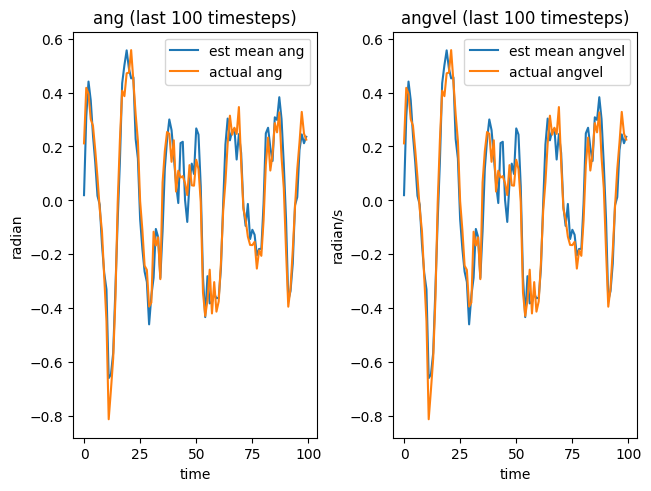

In [ ]:

#system parameters
g = 9.8 #m/s^2
l = 1 #m
dt=0.1 #second
b = 0.2 #damping factor
m = 1 #kg mass of bob

#number of time steps for simulation
nstep = 1000

#process noise
Cov_P =np.array([[0.01,0],
                 [0,0.01]])
P = rng.multivariate_normal([0,0],Cov_P,nstep)

#measurement noise
Cov_M = np.array([[0.01]])
M = rng.multivariate_normal([0],Cov_M,nstep)

#process matrix
A = np.array([[1,dt],[-g*dt/l, -b/m+1]])
#measurement matrix
C = np.array([1,0]).reshape((1,2))

#state matrices
X = np.zeros((nstep,2,1))
#mean
mu = np.zeros((nstep,2,1))
#covariance
cov = np.zeros((nstep,2,2))

#predicted mean and covariance
mu_p = np.zeros((nstep,2,1))
cov_p = np.zeros((nstep,2,2))

#initial mean and covariance
mu[0] = [[0.01],[0]]
cov[0] = np.array([[0.05,0],[0,0.05]])
cov_p[0] = cov[0]

X[0] = mu[0]
mu_p[0]=mu[0]

#other arrays
z = np.zeros(nstep)  #measurement
K = np.zeros((nstep,2,1)) #kalman gain

print(f"{0}: ang={X[0,0]},vel={X[0,1]}, predang={mu_p[0,0]}, corr_ang={mu[0,0]}, K={K[0]}")

for i in range(1,nstep):
  #simulation of pendulum
  #dynamics - use exact -non-linear equation
  X[i,0] = X[i-1,0] + X[i-1,1]*dt + P[i,0] #angle update
  X[i,1] = -g/l*np.sin(X[i-1,0])*dt + (-b/m+1)* X[i-1,1] + P[i,1] #angular velocity update

  #measurement
  z[i] = C @ X[i] + M[i]

  #predict step
  cov_p[i] = #<your code here>
  mu_p[i] = #<your code here>

  #print(f"i={i}: {cov_p[i,0,0]}, {cov_p[i] @ C.T}, {C @ cov_p[i] @ C.T },{cov_p[i] @ C.T@np.linalg.inv(C @ cov_p[i] @ C.T + Cov_M)} ")

  #update step
  K[i] =  #your code here
  mu[i] =  #your code here
  cov[i] = #your code here

  #print(K[i],K[i]@C)

  #print(f"{i}: X={X[i]}, pred={mu_p[i]}, corr={mu[i]}, z={z[i]}, K={K[i]}")


fig,ax = plt.subplots(1,2, layout='constrained')
ax[0].plot(mu[-100:,0],label="est mean ang")
ax[0].plot(X[-100:,0],label="actual ang")
ax[0].set_xlabel("time")
ax[0].set_ylabel("radian")
ax[0].set_title("ang (last 100 timesteps)")
ax[0].legend()

ax[1].plot(mu[-100:,0],label="est mean angvel")
ax[1].plot(X[-100:,0],label="actual angvel")
ax[1].set_xlabel("time")
ax[1].set_ylabel("radian/s")
ax[1].set_title("angvel (last 100 timesteps)")
ax[1].legend()


---
**Online Reference for Kalman Filters**

https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python

